# HW3 Comparison of SVM vs Tree Classifiers 
## Sentiment Classification of IMDB 50,000 reviews dataset with SVM, Random Forest and Decision Tree


#### The goal for this project would be to fit THREE classifiers: TWO FROM HOMEWORK #2  (A DECISION Tree algorithm and  RANDOM FOREST) AND A SUPPORT VECTOR MACHINE.  The classifiers will be trained to take a review from the IMDB Dataset, and classify the review as negative or positive in sentiment.
#### We will download this very popular dataset from Kaggle (it also exists in many other places including within SciKit Learn itself). This dataset has 50,000 user reviews of movies plus a label stating it the sentiment of the review is positive or negative
#### The dataset as you will see if very simple in its raw form. It has two columns, one with with the review itself which can be between 1 word to a few thousand words.  The other feature is the sentiment itself (positive or negative)
#### This project will do HYPERPARAMETER tunings for all our 3 algorithms and a 5-Fold CROSS-VALIDATION comparison to get the optimal ser of parameters and algorithm that performs the best (measured by accuracy).

# Essay

The two articles shared are essentially a comparison of running Support Vector Machines (SVM) to do prediction and compare its effectiveness to the other popular prediction algorithms. The two articles both showed better performance from SVM. Having said, this may be just the nature of the data, randomnnes of how the other models were tuned.  Nonetheless we ran a newly defined SVM classifier and compared it to the same two we ran in HW2 (Random Forest and Decision Tree).

Adding SVM to our stack of models added significant amount of processing time. In fact it went from **16 mimutes to 4 hours**.  That was because for SVM we had many hyperparameters we had to tune. To start we needed to pick a KERNEL. For kernel we had three options (Linear, RBF and Polynomial).  Also we needed to tune the Regularization parameter, the Gamma parameter and the degrees (for Poly Kernel only).  This doubles the number of potential candidates that we would need to run through a 5-Fold crossvalidation.

At the end **SVM did perform materially bettter than Decision Tree and Random Forest** with accruacy going from **81% to 85%**


## a) Nature of the raw data
The raw data is noting more than written review done by thousands of movie viewers. As such they are not nothing more than a collection of words. We analized the raw data a found a few things which are important for this project.

1. The dataset is balanced The dataset has 50,000 reviews, with exactly half positive and half having a negative sentiment label.


2. The range of reviews measured by numbers of words by review was higlhy skewed to the right. Majority of reviews were 100-300 words but we did see a few outliers with almost 3,000 words.


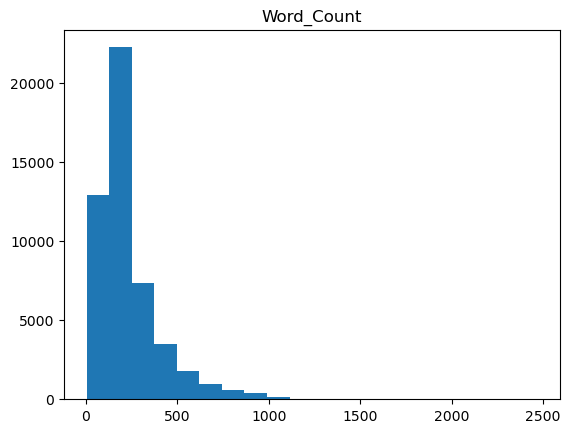

This is important because in order to train and fit a classifier, we would needs to vectorize our reviews. That is to create a bag of words, where each word becomes a feature and the numeric value of each word can be as simple as a word count, but in our case we will use TF-IDF (Term Frequency Inverse Document Frequency) to assign a value to each word-feature. Since most of reviews are less than 500 words, we will limit our word-vectors to the 500 most common words used


## b) Dimensionality reduction though PCA for Visualization

Our dataset has 500 dimensions (after word vectorization) Thus it would be impossible to plot it for us humans. For this homework I used **PCA** to reduce the vectorized dataset from 50,000x 500 to **50,000 x 2**.  Then we fitted an **SVM classifier** using an **RBF** kernel.  The result would not be as good as the trained model with all 500 features, but it would allow us two things:

1. Fitting the model would be much faster
2. We can plot in 2D and 3D 


### Plotting our SVM classfier with RBF Kernel after doing PCA dimensionality reduction

**We can se our SVM classiffier did a decent job classifying the IMDB Reviews**

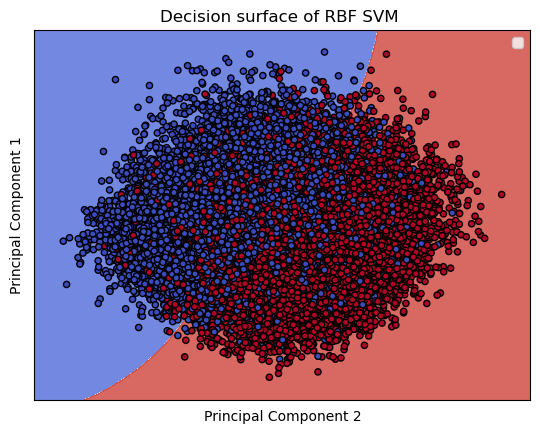

### Plotting our SVM classifier with a LINEAR Kernel after PCA dimensionality reduction

**To show the concept of margins and boundaries for SVM, we also fitted an SVM classifier with a LINEAR kernel. Results were not too bad and close to the RBF Kernel**


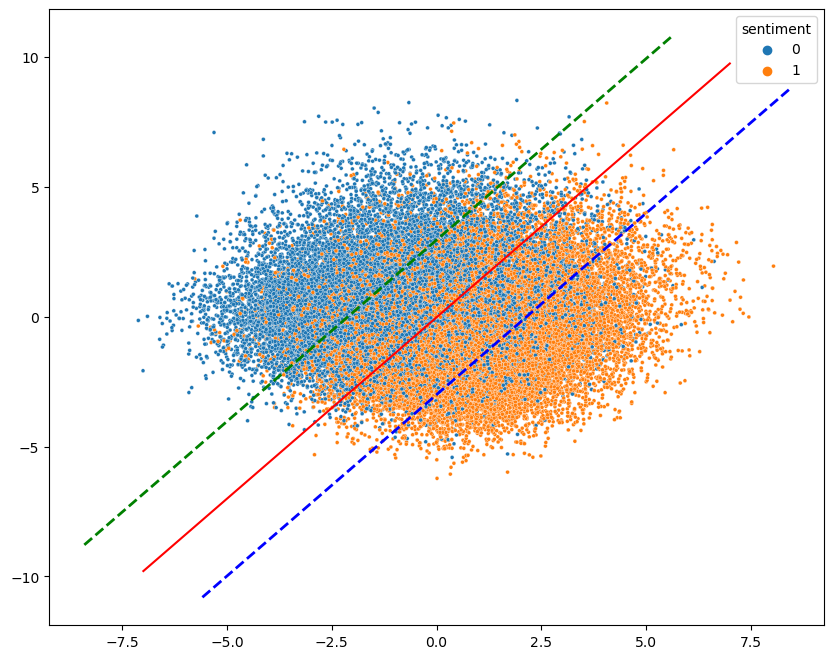

### We also plotted in 3D to show how a hyperplane attempted to separate our data

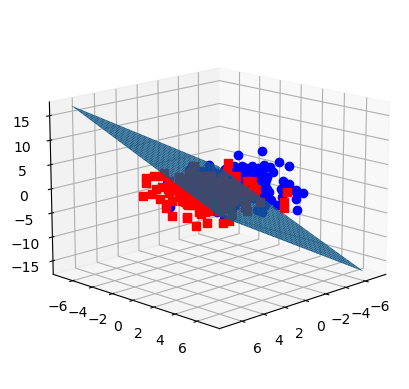

## c) Data Transformations Required

As mentioned before we will need to vectorize each review, by creating a feature for each individual word up to a specified limit. In our case it is 500 words. This is because we saw that most reviews by far are less than 500 words.  Our vectorization will transform our 50,000 x 2 dataset into a 50,000 x 501 dataset. 50,000 rows 1 foreach review. 500 Columns one for each word vector plus 1 more column for the label (sentiment). For the size (value) of each word-vector we will use the TF-IDF (Term Frequency Inverse Document Frequency) formula which assigns a value to each word based on their relative frequency.  The exact formula for TF-IDF is

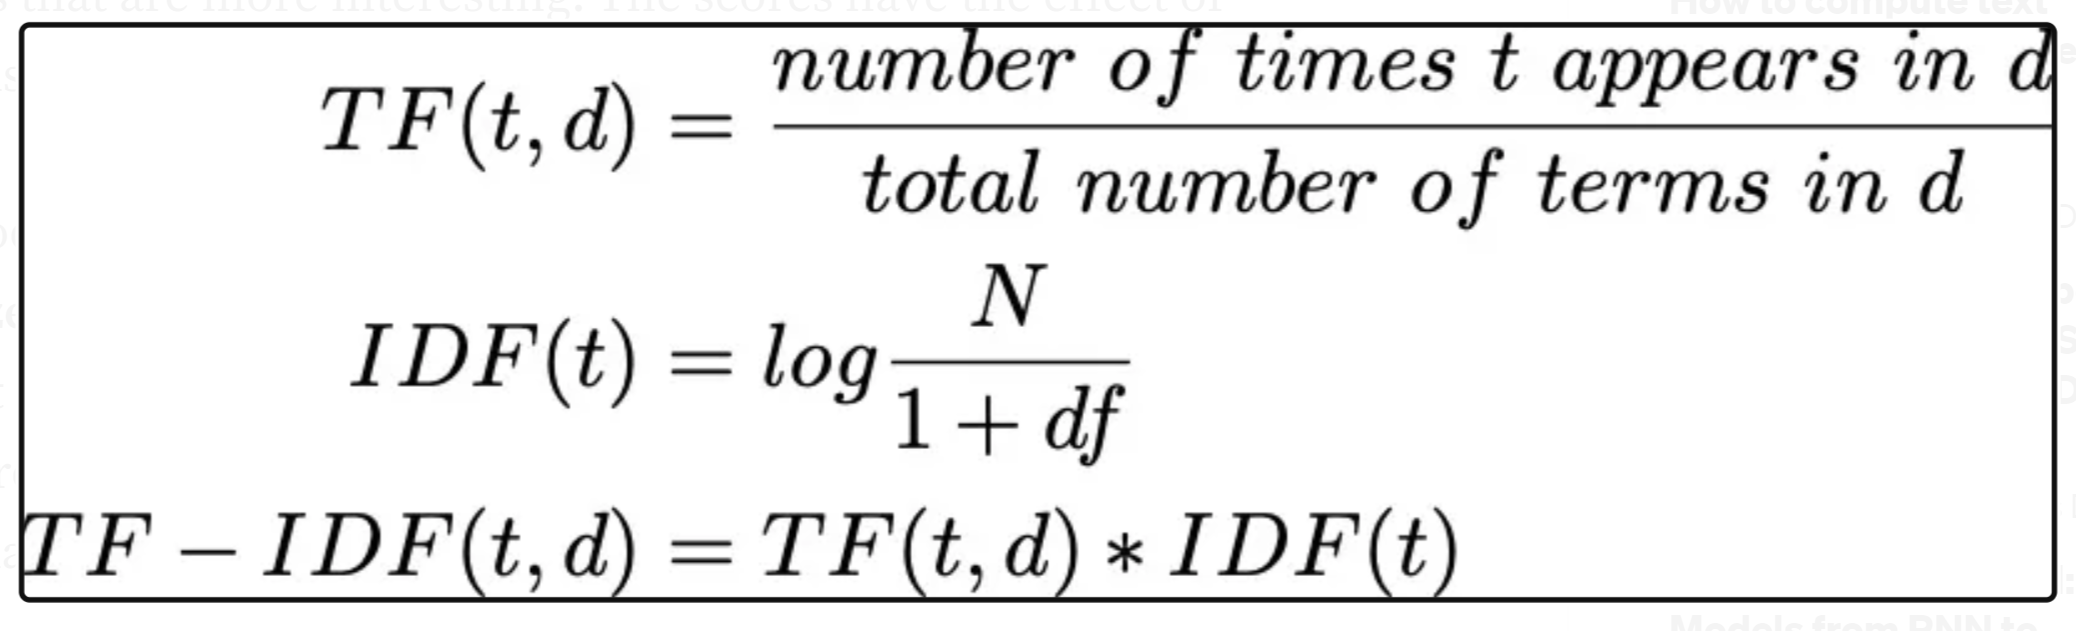

## Results from model fitting and conclusion

As mentioned before **SVM with an RBF Kernel** ended up having better performance (measured by accuracy) than the Random Forest and Decision tree algorithms.  Overal accuracy with the **unseen test** data was **85%** vs 82% from Random Forest in HW2.

We ran a GRID SEARCH to do Hyper-Parameter tuning. Overall we **fitted 60 models** under different hyper-parameter combinations.  We used a Crossvalidation = 5 to divide our training in 5 equal parts, 4 for training and 1 for validation. Therefore overall I fitted **300 models** (60 x 5) to get the overall winner.

The winning SVM model used the **RBF** kernel, a regularization parameter=2 and a gamma = 0.001



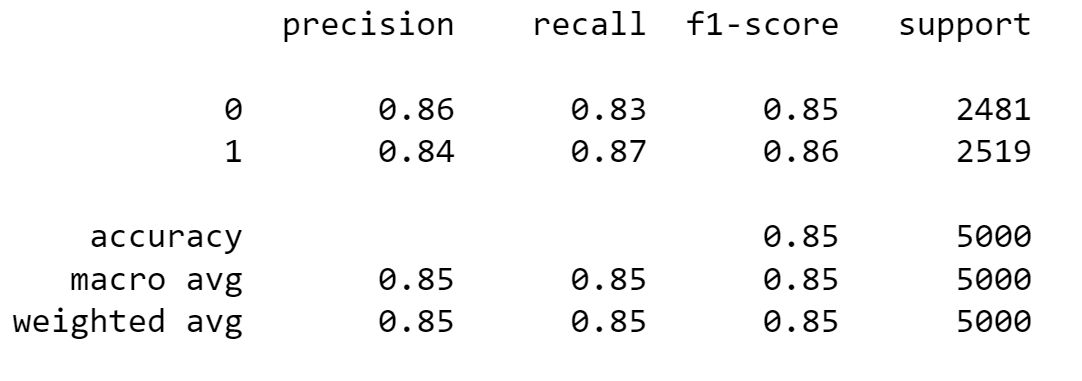

### Plot of Classifier results under each Hyperparameter combination

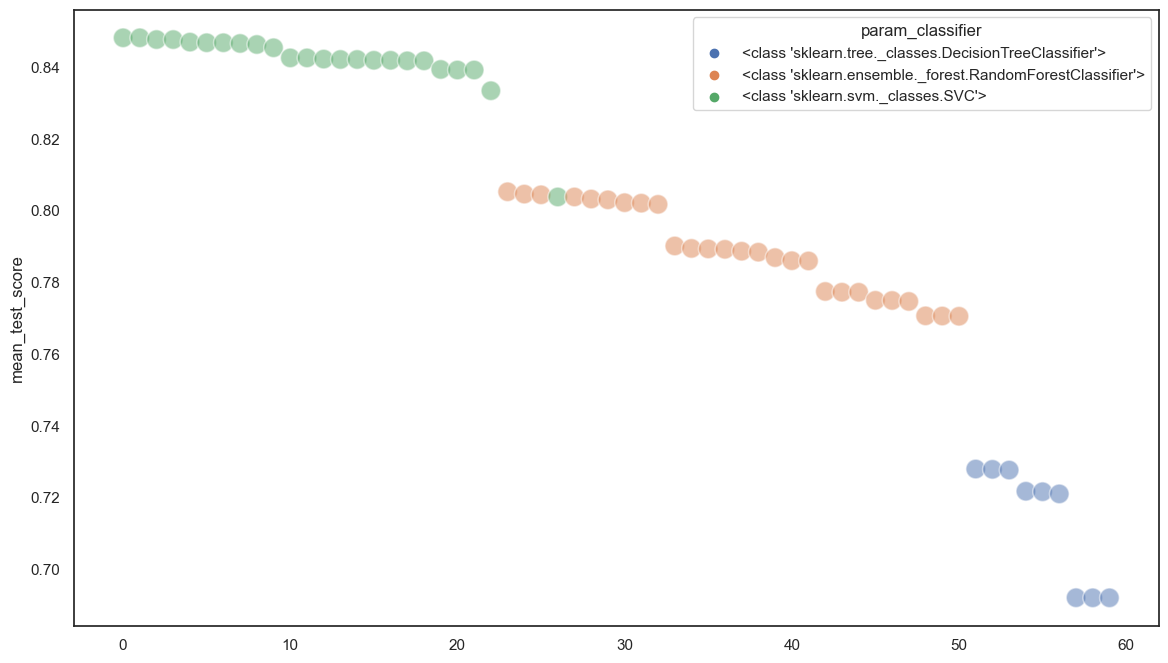

### Distribution of result (accuracy) by Classfier

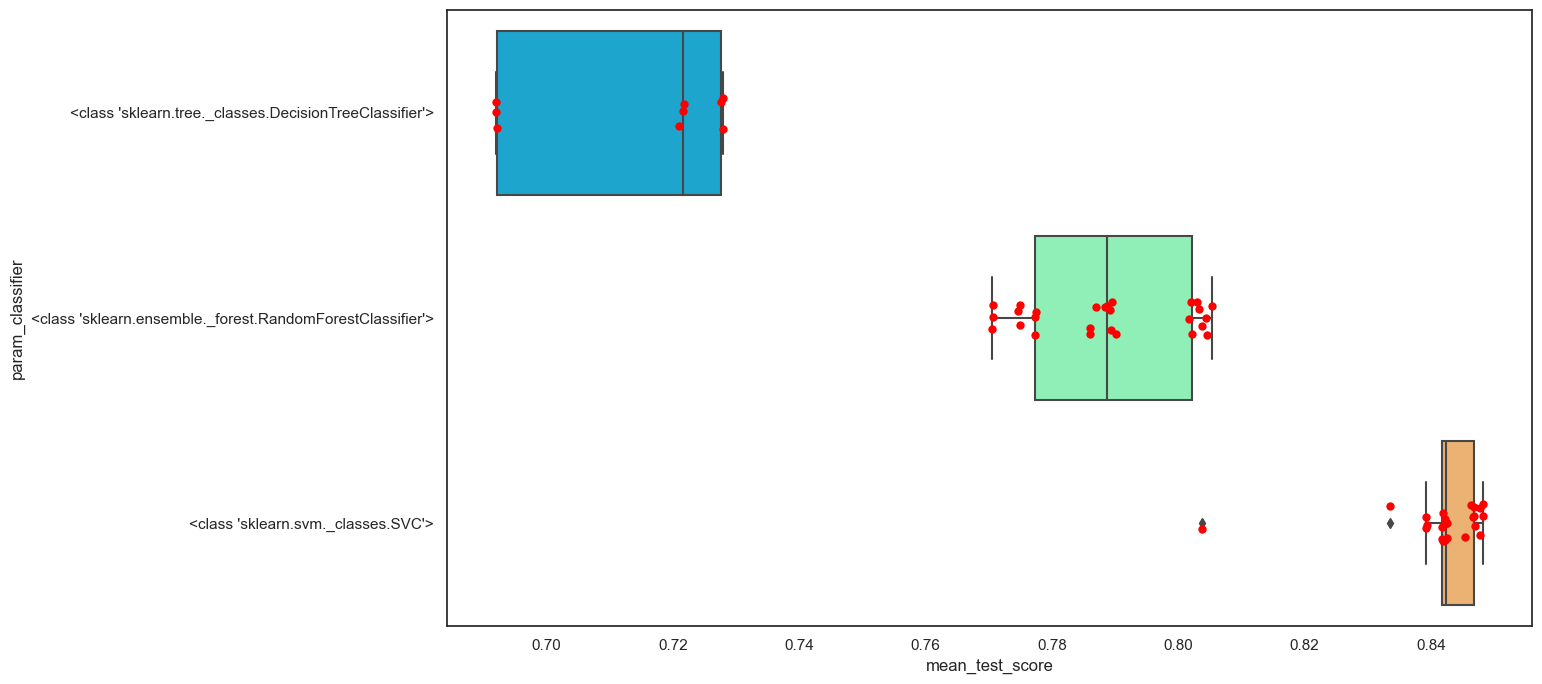

# *************************************************************************************************
# *************************************************************************************************

# PYTHON CODE USED

## Load Libraries to be used

In [62]:
import warnings
import time
warnings.simplefilter(action='ignore', category=FutureWarning)

In [63]:
from sklearn.inspection import permutation_importance
from sklearn.metrics import *
from sklearn import tree

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

#from sklearn import model_selection
from sklearn.utils import class_weight
from sklearn.metrics import classification_report

import pickle
import numpy as np
from numpy import vectorize
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
%matplotlib inline  

#from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer



#  1 Load Data


In [64]:
# We will load 50,000 reviews

# Local download
#df = pd.read_csv("IMDB Dataset.csv")

# Download from personal cloud server for replicability
df = pd.read_csv("http://www.my-cunymsds.com/data622/IMDB Dataset.csv".replace(" ", "%20"))

# 2 Exploratory Data Analysis


In [65]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [67]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [68]:
df.groupby("sentiment").count()

,review
sentiment,
negative,25000
positive,25000


array([[<AxesSubplot: title={'center': 'Word_Count'}>]], dtype=object)

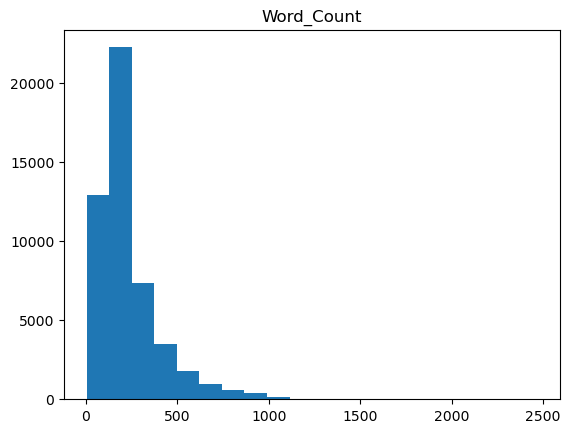

In [69]:
# Distribution of Reviews by word size
df["Word_Count"] = df["review"].apply(lambda n: len(n.split()))

df.hist(bins=20,grid=False)


# 3 Machine Learning

## 3.1 Prepare data

In [70]:
# We will separate the X(features) and y (labels)
df_X = df["review"]
df_y = df["sentiment"]

In [71]:
# We will change the labels positive/negative to 1/0
d = {'positive': 1, 'negative': 0}
df_y = df_y.map(d)
df_y.head()

0    1
1    1
2    1
3    0
4    1
Name: sentiment, dtype: int64

In [72]:
# We have to vectorize the reviews. That means to transform each review into a vector (Bag of words) which uses the TFIDF to provide
# a value for each word (up to 500 here) and their relative importance.

word_vectorizer = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', sublinear_tf=True, strip_accents='unicode',
                                  stop_words='english', ngram_range=(1, 1), max_features=500)
word_vectorizer.fit(df_X)

# The results is a sparse matrix
df_X_tfidf = word_vectorizer.transform(df_X)

# IF you are interested you can also use it as a dense matrix but is not necessary
df_X_tfidf_dense = df_X_tfidf.todense()

In [73]:
# Here we see that the DENSE representation of the vectorized bag of words is a matrix 50,000 x 500

df_X_tfidf_dense.shape

(50000, 500)

In [74]:
# We will extract the Colum Names, which correspond to WORDS. This will be important later to identify
# Important words and also to print the Trees

col_names = word_vectorizer.get_feature_names_out()
col_names

array(['1', '10', '2', '3', '4', '5', '7', 'able', 'absolutely', 'act',
       'acting', 'action', 'actor', 'actors', 'actress', 'actually',
       'age', 'ago', 'amazing', 'american', 'annoying', 'apparently',
       'aren', 'art', 'attempt', 'attention', 'audience', 'away', 'awful',
       'b', 'bad', 'based', 'basically', 'beautiful', 'beginning',
       'believe', 'best', 'better', 'big', 'bit', 'black', 'blood',
       'body', 'book', 'boring', 'boy', 'br', 'brilliant', 'british',
       'brother', 'budget', 'called', 'came', 'camera', 'car', 'care',
       'career', 'case', 'cast', 'certainly', 'chance', 'change',
       'character', 'characters', 'cheap', 'child', 'children', 'cinema',
       'cinematography', 'city', 'class', 'classic', 'clearly', 'close',
       'come', 'comedy', 'comes', 'coming', 'complete', 'completely',
       'cool', 'couldn', 'country', 'couple', 'course', 'crap', 'cut',
       'd', 'dark', 'daughter', 'david', 'day', 'days', 'dead', 'death',
       'dec

In [75]:
# We will split the data between Training and Test
rs = 42
X_train, X_test, y_train, y_test = train_test_split(
    df_X_tfidf, df_y, test_size=0.1, random_state=rs)


## 3.2 Define the Classifiers

In [76]:
# Initialze the classifiers. In this case 1-Decision Tree 2-Random Forest
reg1 = DecisionTreeClassifier(random_state=rs)
reg2 = RandomForestClassifier(random_state=rs)
reg3 = SVC(random_state=rs)

In [77]:
#Initialize the hyperparameters for each dictionary

param1 = {}
param1['classifier__max_depth'] = [5,10,15]
param1['classifier__min_samples_split'] = [5,10,15]
param1['classifier'] = [reg1]

param2 = {}
param2['classifier__n_estimators'] = [100,200,500]
param2['classifier__min_samples_split'] = [5,10,15]
param2['classifier__max_depth'] = [5,10,20]
param2['classifier'] = [reg2]

param3 = {}
param3['classifier__kernel'] = ['linear',  'rbf', 'poly']
param3['classifier__C'] = [0.01,0.1,1,10]
param3['classifier__gamma'] = [1, 0.1, 0.01, 0.001,0.0001]
param3['classifier__degree'] = [2,3]
param3['classifier'] = [reg3]

params = [param1,param2, param3]


In [78]:
# Here de define a simple pipeline, first we impute any missing values, then we fit the classifier
pipeline2 = Pipeline([('imputer',SimpleImputer()),
                      ('classifier', reg1)],verbose=True)



## 3.3 Fit the model / (Gridsearch for HyperParameter Tuning and Cross-Validation)

In [19]:
%%time

#################### Fit all Models doing Cross-Validation and Hyperparameter Tuning
start_time = time.time()

#### Gridsearch CV allows us to to Cross-Validation
gs = GridSearchCV(pipeline2, params, cv=5, n_jobs= -1, scoring='accuracy', 
                  verbose = 4, return_train_score=True).fit(X_train, np.ravel(y_train))

(time.time() - start_time) /60

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[Pipeline] ........... (step 1 of 2) Processing imputer, total=   0.1s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=25.4min
Wall time: 4h 7s


240.12486277421314

#### We had THREE algorithms to train (Decision Tree, RandomForest and SVM under 3 different Kernels). Because of hyper-parameter tuning we ended up this 60 candidate models. When add that we did a cross-validation=5, we fitted a total of 300 models.

#### That took a total of 240 minutes (4 hours)  seconds on my laptop

## 3.4 Review Fit Results of Best Performing Model

In [20]:
# Best performing model and its corresponding hyperparameters
gs.best_params_


{'classifier': SVC(C=2, degree=2, random_state=42),
 'classifier__C': 2,
 'classifier__degree': 2,
 'classifier__kernel': 'rbf'}

In [21]:
# What was the performance (accuracy) score of the best model
gs.best_score_

0.8482000000000001

In [22]:
# Now lets see how our best model perform with unseen Test Data
print("Test Accuracy Score:",accuracy_score(gs.predict(X_test), y_test))
print("Test Precision Score:",precision_score(gs.predict(X_test), y_test))


Test Accuracy Score: 0.8522
Test Precision Score: 0.870186581976975


In [23]:
my_predictions = pd.DataFrame(gs.predict(X_test))

In [24]:
# Lets print a confusion Matrix with Test Data
print(confusion_matrix(my_predictions, y_test))

[[2069  327]
 [ 412 2192]]


In [25]:
print(classification_report(y_test, my_predictions))

              precision    recall  f1-score   support

           0       0.86      0.83      0.85      2481
           1       0.84      0.87      0.86      2519

    accuracy                           0.85      5000
   macro avg       0.85      0.85      0.85      5000
weighted avg       0.85      0.85      0.85      5000



In [28]:
##########################
# SAVE-LOAD using pickle #
##########################
import pickle

# save
with open('model_svm.pkl','wb') as f:
    pickle.dump(gs,f)



In [79]:
# load
with open('model_svm.pkl', 'rb') as f:
    gs = pickle.load(f)



## 3.6 Plot SVM Boundaries

In [66]:
##########################################################################################################################
##########################################################################################################################
####
####                                     PLOT SVM
####
##########################################################################################################################
##########################################################################################################################

In [104]:
####### FOR ALL SOLUTIONS #######

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC

rs = 42
X_train, X_test, y_train, y_test = train_test_split(
    df_X_tfidf_dense, df_y, test_size=0.1, random_state=rs)


scaler = StandardScaler()
scaler.fit(np.asarray(X_train))
X_scaled = scaler.transform(np.asarray(X_train))


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


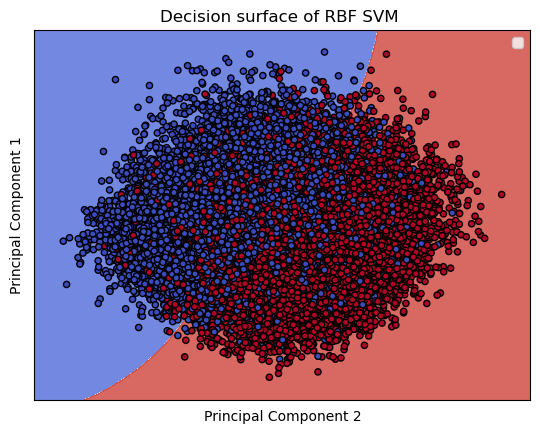

In [105]:
# Solution 1 PCA 2
pca_xfmer = PCA(2)
pca_xfmer.fit(X_scaled)
X_pca = pca_xfmer.transform(X_scaled) 

model = SVC(kernel='rbf')
clf = model.fit(X_pca, y_train)

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of RBF SVM ')
# Set-up grid for plotting.
X0, X1 = X_pca[:, 0], X_pca[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('Principal Component 1')
ax.set_xlabel('Principal Component 2')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()


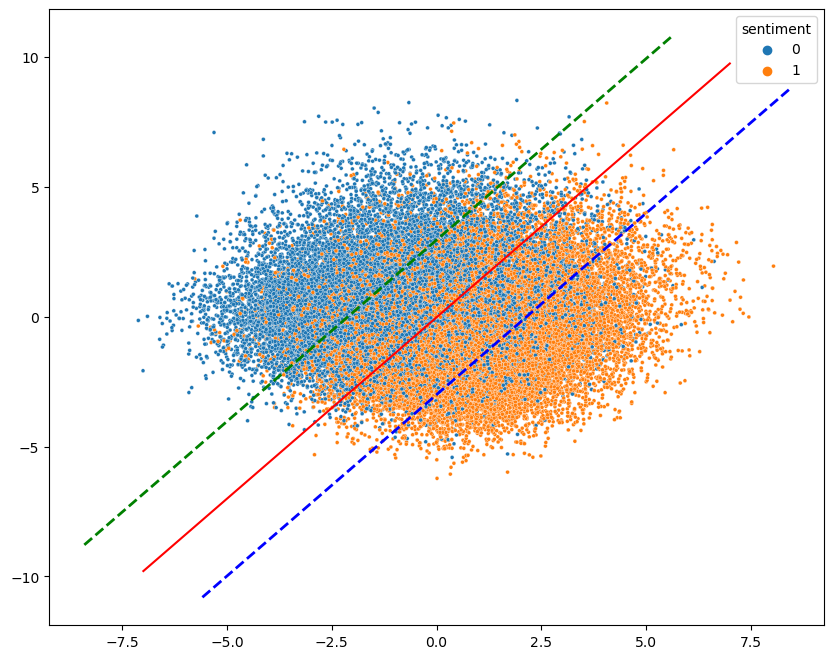

In [42]:
# Solution 2 PCA 2 WITH BOUNDARIES
pca_xfmer = PCA(2)
pca_xfmer.fit(X_scaled)
X_pca = pca_xfmer.transform(X_scaled) 

model = SVC(kernel='linear')
clf = model.fit(X_pca, y_train)

plt.figure(figsize=(10, 8))
# Plotting our two-features-space
sns.scatterplot(x=X_pca[:, 0], 
                y=X_pca[:, 1], 
                hue=y_train, 
                s=8);
# Constructing a hyperplane using a formula.
w = clf.coef_[0]           # w consists of 2 elements
b = clf.intercept_[0]      # b consists of 1 element
x_points = np.linspace(-7, 7)    # generating x-points from -1 to 1
y_points = -(w[0] / w[1]) * x_points - b / w[1]  # getting corresponding y-points

# Plotting a red hyperplane
plt.plot(x_points, y_points, c='r');

# Encircle support vectors
#plt.scatter(clf.support_vectors_[:, 0],
#            clf.support_vectors_[:, 1], 
#            s=50, 
#            facecolors='none', 
#            edgecolors='k', 
#            alpha=.5);

# Step 2 (unit-vector):
w_hat = clf.coef_[0] / (np.sqrt(np.sum(clf.coef_[0] ** 2)))

# Step 3 (margin):
margin = 1 / np.sqrt(np.sum(clf.coef_[0] ** 2))

# Step 4 (calculate points of the margin lines):
decision_boundary_points = np.array(list(zip(x_points, y_points)))
points_of_line_above = decision_boundary_points + w_hat * margin
points_of_line_below = decision_boundary_points - w_hat * margin

# Plot margin lines

# Blue margin line above
plt.plot(points_of_line_above[:, 0], 
         points_of_line_above[:, 1], 
         'b--', 
         linewidth=2)

# Green margin line below
plt.plot(points_of_line_below[:, 0], 
         points_of_line_below[:, 1], 
         'g--',
         linewidth=2)


In [ ]:
# Solution 3D PART 1

import random

pca_xfmer = PCA(3)
pca_xfmer.fit(X_scaled)
X_pca = pca_xfmer.transform(X_scaled) 

model = SVC(kernel='linear')
clf = model.fit(X_pca, y_train)


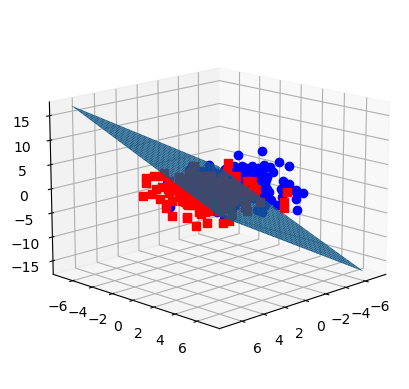

In [103]:
# Solution 3D PART 2

num_list = random.sample(range(X_pca.shape[0]), 500)

X_pca2 = X_pca[num_list,]
y_train2 = y_train.reset_index(drop=True)[num_list]

# The equation of the separating plane is given by all x so that np.dot(svc.coef_[0], x) + b = 0.
# Solve for w3 (z)
z = lambda x,y: (-clf.intercept_[0]-clf.coef_[0][0]*x -clf.coef_[0][1]*y) / clf.coef_[0][2]

tmp = np.linspace(-7,7,30)
x,y = np.meshgrid(tmp,tmp)

fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')
ax.plot3D(X_pca2[y_train2==0,0], X_pca2[y_train2==0,1], X_pca2[y_train2==0,2],'ob')
ax.plot3D(X_pca2[y_train2==1,0], X_pca2[y_train2==1,1], X_pca2[y_train2==1,2],'sr')
ax.plot_surface(x, y, z(x,y))
ax.view_init(15, 45)
plt.show()


# 4 Deep Review of Fit Results


## 4.1 Peformance Results of Fitted Models

<AxesSubplot: >

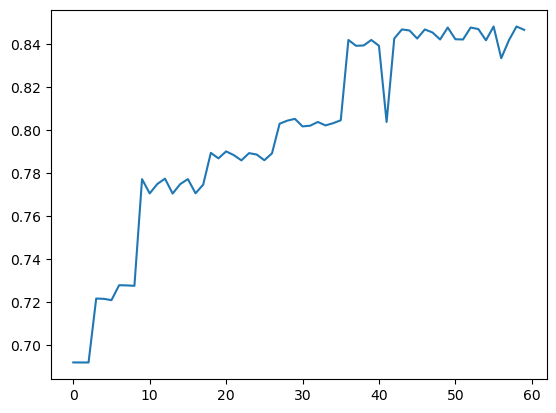

In [34]:
#Let's plot the resulting accuract of all our tested models (36)
pd.DataFrame(gs.cv_results_)['mean_test_score'].plot()

In [35]:
df = pd.DataFrame(gs.cv_results_)
df.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier,param_classifier__max_depth,param_classifier__min_samples_split,param_classifier__n_estimators,param_classifier__C,param_classifier__degree,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.854964,0.075246,0.037899,0.016291,DecisionTreeClassifier(random_state=42),5,5,NaN,NaN,NaN,...,0.692067,0.005600,58,0.697278,0.697528,0.695889,0.699139,0.694861,0.696939,0.001464
1,3.024910,0.152233,0.040691,0.006161,DecisionTreeClassifier(random_state=42),5,10,NaN,NaN,NaN,...,0.692044,0.005578,59,0.697222,0.697444,0.695778,0.699139,0.694861,0.696889,0.001472
2,2.920589,0.106416,0.044681,0.007658,DecisionTreeClassifier(random_state=42),5,15,NaN,NaN,NaN,...,0.692044,0.005578,59,0.697222,0.697444,0.695778,0.699139,0.694861,0.696889,0.001472
3,4.910865,0.557302,0.035106,0.011483,DecisionTreeClassifier(random_state=42),10,5,NaN,NaN,NaN,...,0.721756,0.005521,55,0.756278,0.752167,0.751444,0.753278,0.749056,0.752444,0.002364
4,4.862197,0.499123,0.054852,0.026939,DecisionTreeClassifier(random_state=42),10,10,NaN,NaN,NaN,...,0.721622,0.005306,56,0.755556,0.751139,0.750583,0.752361,0.748361,0.751600,0.002365
5,5.059269,0.566183,0.047673,0.004943,DecisionTreeClassifier(random_state=42),10,15,NaN,NaN,NaN,...,0.721022,0.005408,57,0.754500,0.750194,0.749722,0.751278,0.747333,0.750606,0.002336
6,9.727385,0.228626,0.027328,0.003065,DecisionTreeClassifier(random_state=42),15,5,NaN,NaN,NaN,...,0.727956,0.007807,52,0.796444,0.800306,0.799528,0.797833,0.797833,0.798389,0.001369
7,10.064882,1.543727,0.032911,0.004038,DecisionTreeClassifier(random_state=42),15,10,NaN,NaN,NaN,...,0.727867,0.007176,53,0.793694,0.797139,0.796028,0.794500,0.795528,0.795378,0.001196
8,10.177579,1.200876,0.037699,0.008611,DecisionTreeClassifier(random_state=42),15,15,NaN,NaN,NaN,...,0.727667,0.007208,54,0.789806,0.794361,0.793056,0.790556,0.791944,0.791944,0.001648
9,9.859033,1.081889,0.358841,0.049520,RandomForestClassifier(random_state=42),5,5,100,NaN,NaN,...,0.777244,0.005801,45,0.785028,0.785833,0.785222,0.786472,0.785750,0.785661,0.000508


## 4.2 Prepare Data for detailed review

In [36]:
def return_model(model):
    return str(getattr(model,'__class__'))

In [37]:
df['param_classifier'] = df['param_classifier'].apply(vectorize(return_model))

In [38]:
df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier,param_classifier__max_depth,param_classifier__min_samples_split,param_classifier__n_estimators,param_classifier__C,param_classifier__degree,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.854964,0.075246,0.037899,0.016291,<class 'sklearn.tree._classes.DecisionTreeClas...,5,5,NaN,NaN,NaN,...,0.692067,0.005600,58,0.697278,0.697528,0.695889,0.699139,0.694861,0.696939,0.001464
1,3.024910,0.152233,0.040691,0.006161,<class 'sklearn.tree._classes.DecisionTreeClas...,5,10,NaN,NaN,NaN,...,0.692044,0.005578,59,0.697222,0.697444,0.695778,0.699139,0.694861,0.696889,0.001472
2,2.920589,0.106416,0.044681,0.007658,<class 'sklearn.tree._classes.DecisionTreeClas...,5,15,NaN,NaN,NaN,...,0.692044,0.005578,59,0.697222,0.697444,0.695778,0.699139,0.694861,0.696889,0.001472
3,4.910865,0.557302,0.035106,0.011483,<class 'sklearn.tree._classes.DecisionTreeClas...,10,5,NaN,NaN,NaN,...,0.721756,0.005521,55,0.756278,0.752167,0.751444,0.753278,0.749056,0.752444,0.002364
4,4.862197,0.499123,0.054852,0.026939,<class 'sklearn.tree._classes.DecisionTreeClas...,10,10,NaN,NaN,NaN,...,0.721622,0.005306,56,0.755556,0.751139,0.750583,0.752361,0.748361,0.751600,0.002365


In [39]:
# Let's remove all rows with very low R2 <0 if any
cutoff = -100
df2 = df[df['mean_test_score']>=cutoff]

In [40]:
sorted_index = df2.groupby('param_classifier')['mean_test_score'].median().sort_values().index.tolist()
sorted_index

["<class 'sklearn.tree._classes.DecisionTreeClassifier'>",
 "<class 'sklearn.ensemble._forest.RandomForestClassifier'>",
 "<class 'sklearn.svm._classes.SVC'>"]

In [41]:
df2b = df2
df2b['param_classifier'] = pd.Categorical(df2['param_classifier'], sorted_index)

In [42]:
#Classifiers listed in order of their MAX best score
df2b.groupby('param_classifier')['mean_test_score'].max().sort_values(ascending=False)

param_classifier
<class 'sklearn.svm._classes.SVC'>                           0.848200
<class 'sklearn.ensemble._forest.RandomForestClassifier'>    0.805267
<class 'sklearn.tree._classes.DecisionTreeClassifier'>       0.727956
Name: mean_test_score, dtype: float64

In [43]:
#Top FITS ordered by mean_test_score

all_fits_sorted = df2b[['param_classifier','mean_test_score']].sort_values(by='mean_test_score',ascending=False)
all_fits_sorted.reset_index(drop=True, inplace=True)

all_fits_sorted.head(10)

,param_classifier,mean_test_score
0,<class 'sklearn.svm._classes.SVC'>,0.848200
1,<class 'sklearn.svm._classes.SVC'>,0.848200
2,<class 'sklearn.svm._classes.SVC'>,0.847711
3,<class 'sklearn.svm._classes.SVC'>,0.847711
4,<class 'sklearn.svm._classes.SVC'>,0.847000
5,<class 'sklearn.svm._classes.SVC'>,0.846822
6,<class 'sklearn.svm._classes.SVC'>,0.846822
7,<class 'sklearn.svm._classes.SVC'>,0.846622
8,<class 'sklearn.svm._classes.SVC'>,0.846333
9,<class 'sklearn.svm._classes.SVC'>,0.845422


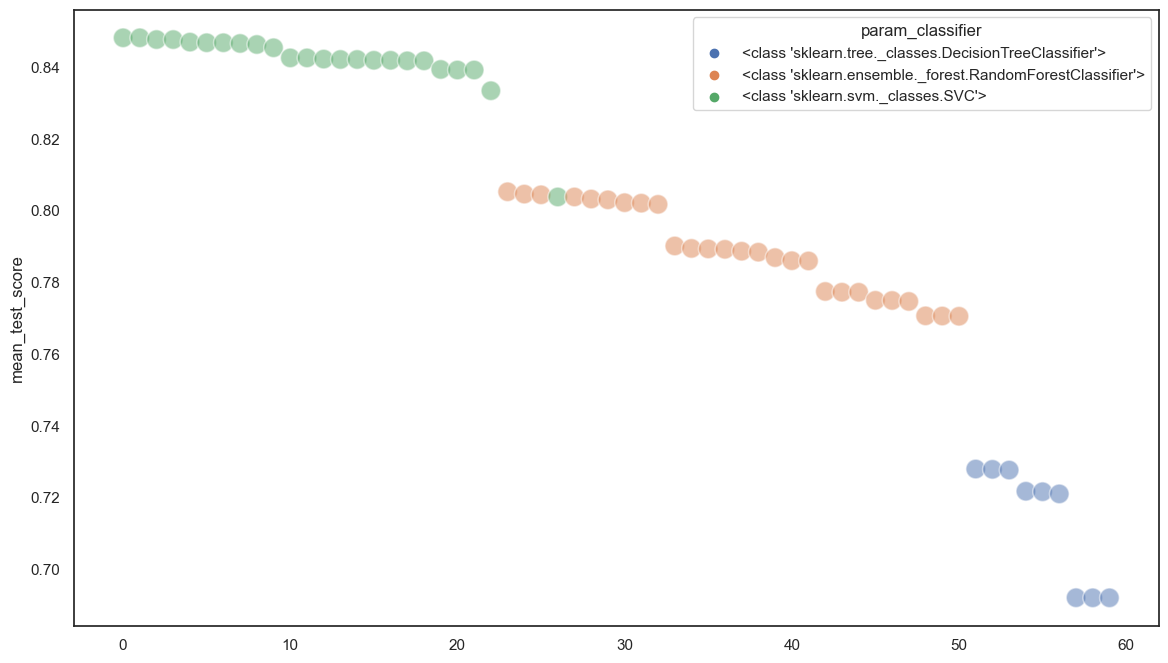

In [44]:
#Lets plot again all our tested models with some information which algorithm each one was
sns.set(rc={'figure.figsize':(14,8)})
sns.set_style("white")
fitplot = sns.scatterplot(x=all_fits_sorted.index, y='mean_test_score',hue="param_classifier", alpha=0.5, s=200,data=all_fits_sorted)
plt.show()

In [47]:
#df2b.boxplot(by ='param_classifier', column =['mean_test_score'], grid = False,figsize=(12, 8), vert=False)

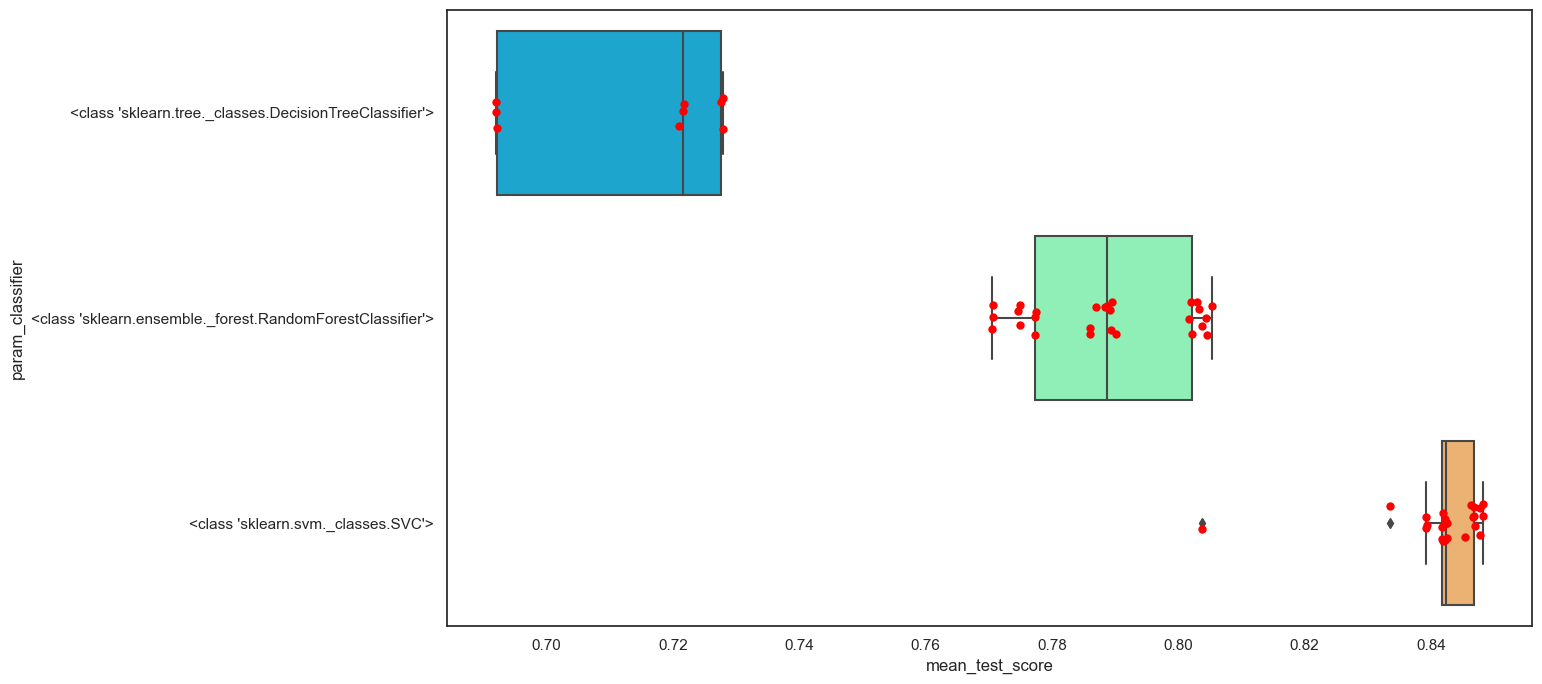

In [45]:
%matplotlib inline  

# Plot both Classifiers and their performance for each fitted model
sns.set(rc={'figure.figsize':(14,8)})
sns.set_style("white")
boxplot = sns.boxplot(y='param_classifier',x='mean_test_score',  data=df2, orient='h', palette="rainbow")
boxplot = sns.stripplot(y='param_classifier',x='mean_test_score',  data=df2, orient='h', color="red", size=6)
plt.show()

## 4.3 Analysis of Best Classifier in Fitting (SVM)


In [46]:
df3 = df[df['param_classifier'] == "<class 'sklearn.svm._classes.SVC'>"]


In [47]:
df3.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier,param_classifier__max_depth,param_classifier__min_samples_split,param_classifier__n_estimators,param_classifier__C,param_classifier__degree,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
36,482.426473,4.891418,97.499648,1.736144,<class 'sklearn.svm._classes.SVC'>,NaN,NaN,NaN,0.1,2,...,0.841933,0.005795,16,0.846667,0.848806,0.846528,0.849000,0.848528,0.847906,0.001080
37,582.382551,5.340286,122.217960,1.357262,<class 'sklearn.svm._classes.SVC'>,NaN,NaN,NaN,0.1,2,...,0.839222,0.004701,21,0.860111,0.860028,0.858472,0.860694,0.859861,0.859833,0.000736
38,633.561083,5.663743,121.217038,3.033022,<class 'sklearn.svm._classes.SVC'>,NaN,NaN,NaN,0.1,2,...,0.839378,0.004172,20,0.869639,0.870333,0.869083,0.870194,0.870417,0.869933,0.000504
39,466.795780,10.496651,97.530035,2.166742,<class 'sklearn.svm._classes.SVC'>,NaN,NaN,NaN,0.1,3,...,0.841933,0.005795,16,0.846667,0.848806,0.846528,0.849000,0.848528,0.847906,0.001080
40,558.775509,2.037978,127.380619,2.358102,<class 'sklearn.svm._classes.SVC'>,NaN,NaN,NaN,0.1,3,...,0.839222,0.004701,21,0.860111,0.860028,0.858472,0.860694,0.859861,0.859833,0.000736


In [48]:
# The next few lines are just to prepare data so we can plot for the selected classifier
param_list = []
param_list = df3[[col for col in df3.columns if col.startswith('param_')]].sum(axis=0,skipna=False)
param_list

param_classifier                       <class 'sklearn.svm._classes.SVC'><class 'skle...
param_classifier__max_depth                                                          NaN
param_classifier__min_samples_split                                                  NaN
param_classifier__n_estimators                                                       NaN
param_classifier__C                                                                 21.6
param_classifier__degree                                                              60
param_classifier__kernel               linearrbfpolylinearrbfpolylinearrbfpolylinearr...
dtype: object

In [49]:
# The next few lines are just to prepare data so we can plot for the selected classifier
param_list = param_list[param_list.notna()]

In [50]:
# The next few lines are just to prepare data so we can plot for the selected classifier
param_list

param_classifier            <class 'sklearn.svm._classes.SVC'><class 'skle...
param_classifier__C                                                      21.6
param_classifier__degree                                                   60
param_classifier__kernel    linearrbfpolylinearrbfpolylinearrbfpolylinearr...
dtype: object

In [51]:
# The next few lines are just to prepare data so we can plot for the selected classifier
param_list = param_list.index.tolist()
param_list

['param_classifier',
 'param_classifier__C',
 'param_classifier__degree',
 'param_classifier__kernel']

## 4.4 Plot HyperParameter Impact of SVM Classifier

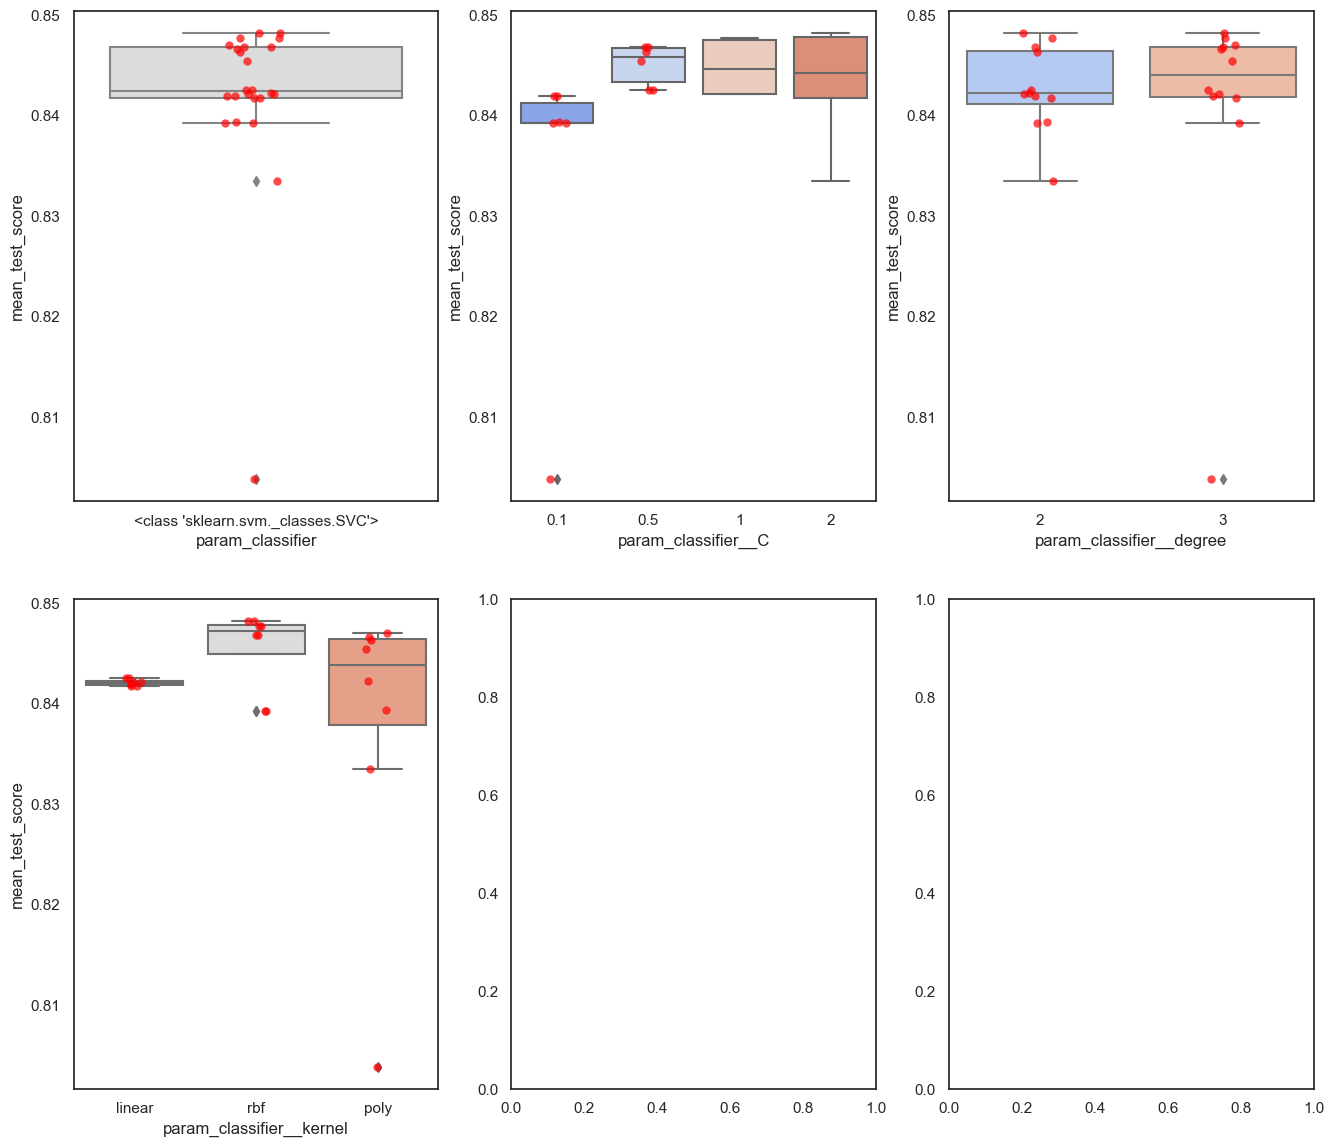

In [52]:
# Plot the impact in accuract for eahc hyperparameter
cols = 3

if int(len(param_list)/cols) != len(param_list)/cols:
    rows = int(len(param_list)/cols) + 1
else:
    rows = int(len(param_list)/cols)

rows = max(2,rows)

figure, axes = plt.subplots(rows, cols, sharex=False, figsize=(16,14))

row = 0
col = 0
for param in param_list:
    sns.boxplot(ax=axes[row,col], data=df3, x=param, y='mean_test_score', palette="coolwarm")
    sns.stripplot(ax=axes[row,col], data=df3, x=param, y='mean_test_score', color='red', size=6, alpha=0.7)

    if col == (cols-1):
        row += 1
        col=0
    else:
        col += 1

#swarmnplot, violinplot, stripplot, barplot, pointplot, boxplot 

In [53]:
#############################################################################################
#############################################################################################
#
#   SNIPPETS of code which could be useful for other things
#
#############################################################################################
#############################################################################################

In [54]:
df2.groupby('param_classifier')['param_classifier'].count()

param_classifier
<class 'sklearn.tree._classes.DecisionTreeClassifier'>        9
<class 'sklearn.ensemble._forest.RandomForestClassifier'>    27
<class 'sklearn.svm._classes.SVC'>                           24
Name: param_classifier, dtype: int64

In [55]:
gs.best_estimator_.steps[1][1].feature_importances_

AttributeError: 'SVC' object has no attribute 'feature_importances_'

In [56]:
gs.best_estimator_.steps[1][1]

SVC(C=2, degree=2, random_state=42)

In [57]:
gs.cv_results_['mean_test_score']

array([0.69206667, 0.69204444, 0.69204444, 0.72175556, 0.72162222,
       0.72102222, 0.72795556, 0.72786667, 0.72766667, 0.77724444,
       0.77062222, 0.775     , 0.77746667, 0.77055556, 0.77495556,
       0.77726667, 0.77066667, 0.77468889, 0.78946667, 0.78691111,
       0.79015556, 0.78842222, 0.78597778, 0.78933333, 0.78868889,
       0.78604444, 0.78922222, 0.80302222, 0.80442222, 0.80526667,
       0.80175556, 0.80208889, 0.80382222, 0.80222222, 0.80324444,
       0.80462222, 0.84193333, 0.83922222, 0.83937778, 0.84193333,
       0.83922222, 0.80382222, 0.8426    , 0.84682222, 0.84633333,
       0.8426    , 0.84682222, 0.84542222, 0.84215556, 0.84771111,
       0.84226667, 0.84215556, 0.84771111, 0.847     , 0.84177778,
       0.8482    , 0.83344444, 0.84177778, 0.8482    , 0.84662222])

In [58]:
gs.cv_results_['rank_test_score']

array([58, 59, 59, 55, 56, 57, 52, 53, 54, 45, 50, 46, 43, 51, 47, 44, 49,
       48, 35, 40, 34, 39, 42, 36, 38, 41, 37, 30, 26, 24, 33, 32, 27, 31,
       29, 25, 16, 21, 20, 16, 21, 27, 11,  6,  9, 11,  6, 10, 14,  3, 13,
       14,  3,  5, 18,  1, 23, 18,  1,  8])

In [59]:
gs.cv_results_['split0_test_score']

array([0.69055556, 0.69055556, 0.69055556, 0.72544444, 0.72577778,
       0.72444444, 0.72866667, 0.729     , 0.72866667, 0.77977778,
       0.77444444, 0.77966667, 0.781     , 0.77411111, 0.77911111,
       0.78077778, 0.77411111, 0.77955556, 0.79333333, 0.79177778,
       0.79411111, 0.79055556, 0.78944444, 0.79166667, 0.79233333,
       0.78955556, 0.79277778, 0.805     , 0.807     , 0.80655556,
       0.80277778, 0.80077778, 0.80466667, 0.80344444, 0.80455556,
       0.80533333, 0.84655556, 0.84066667, 0.83955556, 0.84655556,
       0.84066667, 0.80588889, 0.84655556, 0.85022222, 0.85066667,
       0.84655556, 0.85022222, 0.84866667, 0.84711111, 0.852     ,
       0.84677778, 0.84711111, 0.852     , 0.85277778, 0.84655556,
       0.85266667, 0.84055556, 0.84655556, 0.85266667, 0.85122222])

In [60]:
gs.cv_results_['param_classifier'][1]

DecisionTreeClassifier(random_state=42)

In [61]:
pd.DataFrame(gs.cv_results_)['param_classifier'][23]

RandomForestClassifier(random_state=42)

In [62]:
pd.DataFrame(gs.cv_results_).dtypes

mean_fit_time                          float64
std_fit_time                           float64
mean_score_time                        float64
std_score_time                         float64
param_classifier                        object
param_classifier__max_depth             object
param_classifier__min_samples_split     object
param_classifier__n_estimators          object
param_classifier__C                     object
param_classifier__degree                object
param_classifier__kernel                object
params                                  object
split0_test_score                      float64
split1_test_score                      float64
split2_test_score                      float64
split3_test_score                      float64
split4_test_score                      float64
mean_test_score                        float64
std_test_score                         float64
rank_test_score                          int32
split0_train_score                     float64
split1_train_

In [63]:
dir(df['param_classifier'][0])

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmod__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'capitalize',
 'casefold',
 'center',
 'count',
 'encode',
 'endswith',
 'expandtabs',
 'find',
 'format',
 'format_map',
 'index',
 'isalnum',
 'isalpha',
 'isascii',
 'isdecimal',
 'isdigit',
 'isidentifier',
 'islower',
 'isnumeric',
 'isprintable',
 'isspace',
 'istitle',
 'isupper',
 'join',
 'ljust',
 'lower',
 'lstrip',
 'maketrans',
 'partition',
 'replace',
 'rfind',
 'rindex',
 'rjust',
 'rpartition',
 'rsplit',
 'rstrip',
 'split',
 'splitlines',
 'startswith',
 'strip',
 'swapcase',
 'title',
 'translate',
 'upper',


In [64]:
str(getattr(df['param_classifier'][0],'__class__'))

"<class 'str'>"

In [65]:
df['param_classifier'].astype(str)

0     <class 'sklearn.tree._classes.DecisionTreeClas...
1     <class 'sklearn.tree._classes.DecisionTreeClas...
2     <class 'sklearn.tree._classes.DecisionTreeClas...
3     <class 'sklearn.tree._classes.DecisionTreeClas...
4     <class 'sklearn.tree._classes.DecisionTreeClas...
5     <class 'sklearn.tree._classes.DecisionTreeClas...
6     <class 'sklearn.tree._classes.DecisionTreeClas...
7     <class 'sklearn.tree._classes.DecisionTreeClas...
8     <class 'sklearn.tree._classes.DecisionTreeClas...
9     <class 'sklearn.ensemble._forest.RandomForestC...
10    <class 'sklearn.ensemble._forest.RandomForestC...
11    <class 'sklearn.ensemble._forest.RandomForestC...
12    <class 'sklearn.ensemble._forest.RandomForestC...
13    <class 'sklearn.ensemble._forest.RandomForestC...
14    <class 'sklearn.ensemble._forest.RandomForestC...
15    <class 'sklearn.ensemble._forest.RandomForestC...
16    <class 'sklearn.ensemble._forest.RandomForestC...
17    <class 'sklearn.ensemble._forest.RandomFor